In [2]:
#import all our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
#creating a set of random latitude/longitudes combos
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs
            

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-44.89553902553264 -141.41650449314164
73.1709556919358 38.14497749943098
-55.54190214271572 -73.77584574554821
64.70859809248483 -28.61142302735766
47.50533626841303 -140.72340401002373
87.90823676973386 -19.044162163940882
58.57420030729526 145.74873498169347
-75.68480014702935 -22.3936195688986
38.3497776264461 82.57110967888724
37.76386097289597 -37.69168250170736
-42.78815257055201 -4.753654484459844
-87.26796179337758 -52.324202891603576
57.23282191406412 9.668855248977934
29.927543627767832 81.50891293441362
80.99962005083879 140.19603741332008
-49.37410352246464 -100.42204554017113
26.94727558085603 15.954939989858161
69.61828840083083 -66.03938282227973
-24.249038235569515 175.27008719184448
-58.68017512771122 112.7115708265647
18.160273641744325 -134.547763096564
-2.8752582376903746 -59.70082257790109
20.667725830818057 109.07078752948541
-41.97621901765323 -6.219257953106364
-76.09828234418148 155.9851684352218
37.687952980105095 -146.38485472458444
34.394844962181665 -111.8

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
    
len(cities)      

634

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | olafsvik
Processing Record 5 of Set 1 | sitka
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | okhotsk
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | kuche
City not found. Skipping...
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | pandrup
Processing Record 13 of Set 1 | dharchula
Processing Record 14 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | sabha
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | isangel
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | hilo
Processing Rec

Processing Record 40 of Set 4 | kotovo
Processing Record 41 of Set 4 | ahipara
Processing Record 42 of Set 4 | teresina
Processing Record 43 of Set 4 | lavrentiya
Processing Record 44 of Set 4 | silale
Processing Record 45 of Set 4 | taltal
Processing Record 46 of Set 4 | hermanus
Processing Record 47 of Set 4 | elbrus
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | ustyuzhna
Processing Record 50 of Set 4 | longlac
City not found. Skipping...
Processing Record 1 of Set 5 | requena
Processing Record 2 of Set 5 | bubaque
Processing Record 3 of Set 5 | jishui
Processing Record 4 of Set 5 | gotsu
Processing Record 5 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 6 of Set 5 | rabat
Processing Record 7 of Set 5 | price
Processing Record 8 of Set 5 | jiuquan
Processing Record 9 of Set 5 | saldus
Processing Record 10 of Set 5 | pokhara
Processing Record 11 of Set 5 | iqaluit
Processing Record 12 of Set 5 | mehamn
Processing Record 13 of Set 5 | til

Processing Record 34 of Set 8 | novoagansk
Processing Record 35 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 8 | halalo
City not found. Skipping...
Processing Record 37 of Set 8 | key largo
Processing Record 38 of Set 8 | college
Processing Record 39 of Set 8 | geraldton
Processing Record 40 of Set 8 | labuhan
Processing Record 41 of Set 8 | belmonte
Processing Record 42 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 43 of Set 8 | borlange
City not found. Skipping...
Processing Record 44 of Set 8 | bichura
Processing Record 45 of Set 8 | nanortalik
Processing Record 46 of Set 8 | priyutnoye
Processing Record 47 of Set 8 | teacapan
Processing Record 48 of Set 8 | tallahassee
Processing Record 49 of Set 8 | banyo
Processing Record 50 of Set 8 | santa maria do para
Processing Record 1 of Set 9 | chumikan
Processing Record 2 of Set 9 | bandarbeyla
Processing Record 3 of Set 9 | oxford
Processing Record 4 of Set 9 | virginia beach
Proc

Processing Record 20 of Set 12 | sioux lookout
Processing Record 21 of Set 12 | fushan
Processing Record 22 of Set 12 | santa fe do sul
Processing Record 23 of Set 12 | altay
Processing Record 24 of Set 12 | kedrovyy
Processing Record 25 of Set 12 | halifax
Processing Record 26 of Set 12 | yulara
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | auki
Processing Record 29 of Set 12 | namatanai
Processing Record 30 of Set 12 | byron bay
Processing Record 31 of Set 12 | inta
Processing Record 32 of Set 12 | la ronge
Processing Record 33 of Set 12 | bojnurd
Processing Record 34 of Set 12 | iskateley
Processing Record 35 of Set 12 | santa cruz
Processing Record 36 of Set 12 | beringovskiy
Processing Record 37 of Set 12 | plastun
Processing Record 38 of Set 12 | barranca
Processing Record 39 of Set 12 | vanavara
Processing Record 40 of Set 12 | iquitos
Processing Record 41 of Set 12 | issoire
Processing Record 42 of Set 12 | lubango
Processing Record 43 of Set 12 | bad

In [10]:
len(city_data)

588

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,72.66,78,100,12.41,PF,2022-07-22 09:07:22
1,Punta Arenas,-53.1500,-70.9167,33.91,86,20,17.27,CL,2022-07-22 09:07:22
2,Olafsvik,64.8945,-23.7142,51.84,93,100,6.60,IS,2022-07-22 09:07:23
3,Sitka,57.0531,-135.3300,53.49,87,100,3.44,US,2022-07-22 09:07:23
4,Okhotsk,59.3833,143.3000,59.59,85,100,7.40,RU,2022-07-22 09:07:23
5,Ushuaia,-54.8000,-68.3000,33.46,86,75,32.21,AR,2022-07-22 09:07:24
6,Ribeira Grande,38.5167,-28.7000,72.00,88,40,2.30,PT,2022-07-22 09:07:24
7,Saldanha,-33.0117,17.9442,58.15,73,100,6.06,ZA,2022-07-22 09:07:24
8,Pandrup,57.2215,9.6757,64.31,88,75,11.50,DK,2022-07-22 09:07:25
9,Dharchula,29.8500,80.5333,80.83,83,87,4.65,IN,2022-07-22 09:07:25


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-07-22 09:07:22,-23.1203,-134.9692,72.66,78,100,12.41
1,Punta Arenas,CL,2022-07-22 09:07:22,-53.1500,-70.9167,33.91,86,20,17.27
2,Olafsvik,IS,2022-07-22 09:07:23,64.8945,-23.7142,51.84,93,100,6.60
3,Sitka,US,2022-07-22 09:07:23,57.0531,-135.3300,53.49,87,100,3.44
4,Okhotsk,RU,2022-07-22 09:07:23,59.3833,143.3000,59.59,85,100,7.40
...,...,...,...,...,...,...,...,...,...
583,Colwyn Bay,GB,2022-07-22 09:22:06,53.2948,-3.7267,62.46,88,100,7.02
584,Sorong,ID,2022-07-22 09:22:06,-0.8833,131.2500,79.61,84,66,13.96
585,Yining,CN,2022-07-22 09:22:06,29.0361,114.5636,98.17,48,87,6.26
586,Lakatoro,VU,2022-07-22 09:22:07,-16.0999,167.4164,79.81,85,100,13.98


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
#creating new variables using the cooresponding columns from the citydata df

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

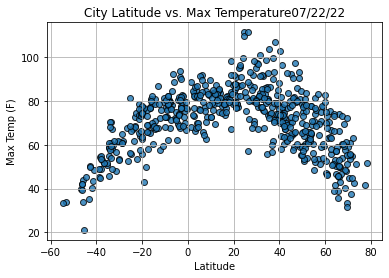

In [27]:
#importing the time mod
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#time for other graph stuff
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

#time for a save
plt.savefig("weather_data/Fig1.png")

#time for a peek
plt.show()

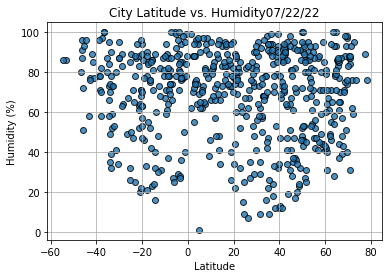

In [28]:
# refractoring for humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#time for other graph stuff
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#time for a save
plt.savefig("weather_data/Fig2.png")

#time for a peek
plt.show()

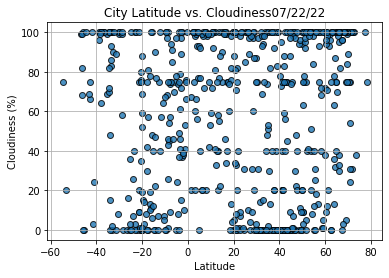

In [29]:
#refractoring for cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#time for other graph stuff
plt.title(f"City Latitude vs. Cloudiness"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#time for a save
plt.savefig("weather_data/Fig3.png")

#time for a peek
plt.show()